<a href="https://colab.research.google.com/github/dnz-s/GlobalAI-Summer-Camp-22-End_to_end_data_science/blob/main/End_to_end_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gerekli kütüphanelerin eklenmesi

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# Veri Seti: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [147]:
df = pd.read_csv ('insurance.csv')

In [148]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [149]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [151]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Keşifsel Veri Analizi Yapılması

Veriyi inceleyerek, analiz ederek veriden anlamlı sonuçlar çıkarınız.

1. Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz.
2. “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz.
3. “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
4. “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
5. En çok “children”’a sahip “region”’ı bulunuz.
6. “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
6. “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
7. “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
8. “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
9. “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.




1. Bmi(Vücut Kitle İndeksi)’nin dağılımı

In [152]:
df.bmi.min() #en düşük bmi

15.96

In [153]:
df.bmi.max() #en yüksek bmi

53.13

In [154]:
df.bmi.head() #bmi ilk beş veri

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [155]:
df.bmi.tail() #bmi son beş veri

1333    30.97
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, dtype: float64

In [156]:
df.bmi.describe() #bmi tanımlayıcı istatistikler

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

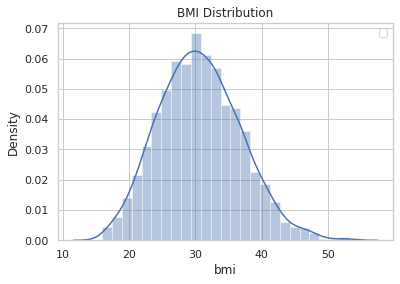

In [157]:
#BMI Distribution
sns.distplot(df.bmi, kde = True)
plt.legend(loc = 'best')
plt.title('BMI Distribution')

In [158]:
df.loc[df['bmi'] <= 18.5, 'weight_condition'] = 'underweight'
df.loc[(df['bmi'] > 18.5) & (df['bmi'] <= 25), 'weight_condition'] = 'normal'
df.loc[(df['bmi'] >25) & (df['bmi'] <= 35), 'weight_condition'] = 'overweight'
df.loc[df['bmi'] >35, 'weight_condition'] = 'obese'
df['weight_condition'].value_counts()


overweight     775
obese          316
normal         226
underweight     21
Name: weight_condition, dtype: int64

In [159]:
bmi = pd.cut(x=df['bmi'],
             bins=[0, 18.5, 25, 35, 55]).value_counts().sort_index()


print(bmi)

(0.0, 18.5]      21
(18.5, 25.0]    226
(25.0, 35.0]    775
(35.0, 55.0]    316
Name: bmi, dtype: int64


In [160]:
weight_condition = df['weight_condition']
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,overweight
2,28,male,33.000,3,no,southeast,4449.46200,overweight
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


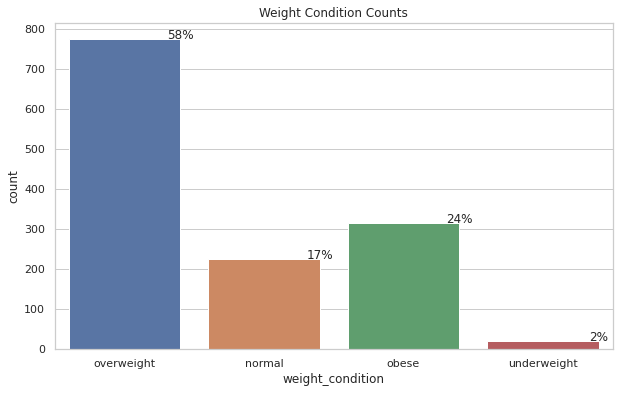

In [161]:
total = len(df)
plt.figure(figsize = (10, 6))
plt.title('Weight Condition Counts')
ax = sns.countplot(x = 'weight_condition', data = df)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [162]:
#BMI dağılımı için etiketler
deg = ['15-18.5', '18.5-25', '25-35','35-55'] 
print(deg)
len(deg)

['15-18.5', '18.5-25', '25-35', '35-55']


4

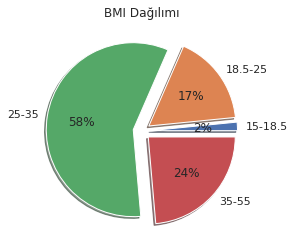

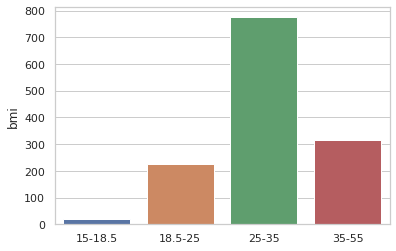

In [163]:
#BMI dağılımı pie chart
plt.pie(bmi, labels = deg,  explode = (0.1, 0.1, 0.1, 0.1), shadow=True, autopct='%1.0f%%')
plt.title("BMI Dağılımı")
plt.show() 

 #BMI dağılımı bar chart
sns.barplot(x =deg, y = bmi)

In [164]:
#BMI ortalaması 30 (overweight), %58'i overweight, %24'ü obese. Örneklemin yaklaşık %80'i şişman ve obez kategorisinde. 

2. “smoker” ile “charges” arasındaki ilişki

In [165]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [166]:
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [167]:
df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [168]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

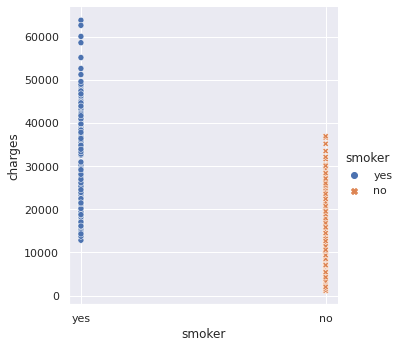

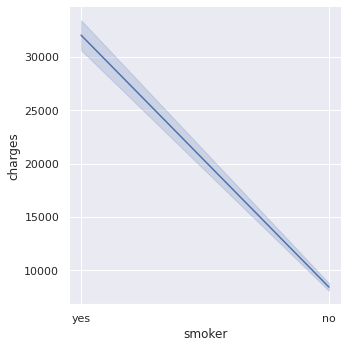

In [169]:
sns.set_theme(style="darkgrid")
#'smoker' ve 'charges' arasındaki ilişki


sns.relplot(x = df.smoker, y = df.charges, data = df, hue='smoker', style="smoker")
plt.show()


sns.relplot(x = df.smoker, y = df.charges, data = df, kind='line') 
plt.show()

In [170]:
#Sigara içenlerin ücreti içmeyenlere göre daha yüksek.

3. “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişki

In [171]:
region = df.region
region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

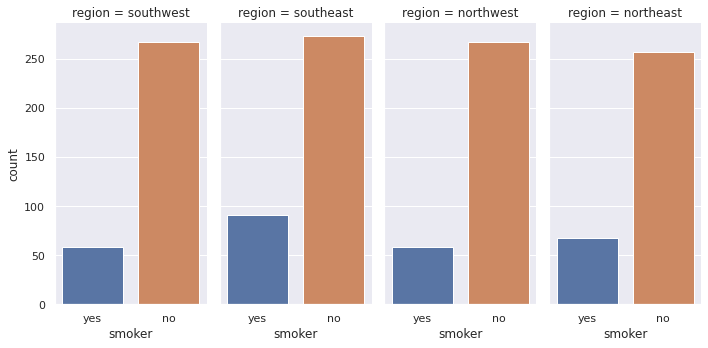

In [172]:
sns.catplot(x = 'smoker', col = 'region', data = df, kind = 'count', aspect = 0.5)

In [173]:
#Her bölgede sigara içenlerin sayısı
northwest_y = df[df.region == "northwest"][df.smoker == "yes"].smoker.count()
northeast_y = df[df.region == "northeast"][df.smoker == "yes"].smoker.count()
southwest_y = df[df.region == "southwest"][df.smoker == "yes"].smoker.count()
southeast_y = df[df.region == "southeast"][df.smoker == "yes"].smoker.count()
#Her bölgede sigara içmeyenlerin sayısı
northwest_n = df[df.region == "northwest"][df.smoker == "no"].smoker.count()
northeast_n = df[df.region == "northeast"][df.smoker == "no"].smoker.count()
southwest_n = df[df.region == "southwest"][df.smoker == "no"].smoker.count()
southeast_n = df[df.region == "southeast"][df.smoker == "no"].smoker.count()

print(northwest_y,northwest_n)
print(northeast_y, northeast_n)
print(southwest_y, southwest_n)
print(southeast_y, southeast_n)

58 267
67 257
58 267
91 273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/li

In [174]:
region_y = [northwest_y, northeast_y, southwest_y, southeast_y]
labels_y = ["Northwest", "Northeast", "Southwest", "Southeast"]
region_n = [northwest_n, northeast_n, southwest_n, southeast_n]
labels_n = ["Northwest", "Northeast", "Southwest", "Southeast"]

#Bölgelere göre sigara içen/içmeyen sayısı
labels_yn = ['Yes', 'No']
#Northwest (Yes/No)
nw_yn = [northwest_y, northeast_n]
#Northeast (Yes/No)
ne_yn = [northeast_y, northeast_n]
#Southwest (Yes/No)
sw_yn = [southwest_y, southwest_n]
#Southeast (Yes/No)
se_yn = [southeast_y, southeast_n]

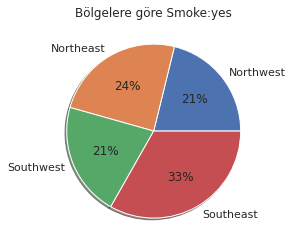

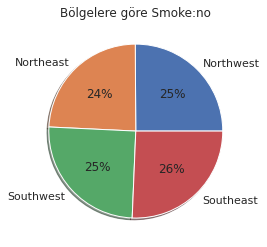

In [175]:
#"smoke" ile "region" arasındaki ilişki - pie chart
plt.pie(region_y, labels=labels_y, shadow=True, autopct='%1.0f%%')
plt.title("Bölgelere göre Smoke:yes")
plt.show() 
#"smoke" ile "region" arasındaki ilişki - pie chart
plt.pie(region_n, labels=labels_n, shadow=True, autopct='%1.0f%%')
plt.title("Bölgelere göre Smoke:no")
plt.show() 

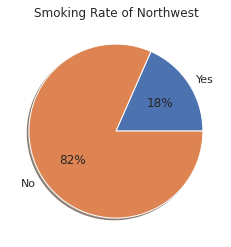

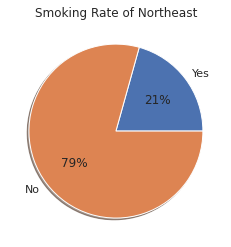

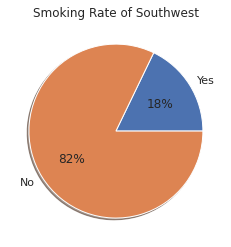

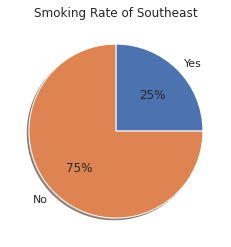

In [176]:
#Northwest (Yes/No)
plt.pie(nw_yn, labels=labels_yn, shadow=True, autopct='%1.0f%%')
plt.title("Smoking Rate of Northwest")
plt.show() 
#Northeast (Yes/No)
plt.pie(ne_yn, labels=labels_yn, shadow=True, autopct='%1.0f%%')
plt.title("Smoking Rate of Northeast")
plt.show() 
#Southwest (Yes/No)
plt.pie(sw_yn, labels=labels_yn, shadow=True, autopct='%1.0f%%')
plt.title("Smoking Rate of Southwest")
plt.show() 
#Southeast (Yes/No)
plt.pie(se_yn, labels=labels_yn, shadow=True, autopct='%1.0f%%')
plt.title("Smoking Rate of Southeast")
plt.show() 

In [177]:
#Sigara içme oranı en yüksek bölge, Southeast. Southeast > Northeast > Southwest = Northwest.

4. "bmi" ile “sex”(Cinsiyet) arasındaki ilişki

In [178]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [180]:
#Cinsiyete göre kilo durumu
female_obese = df[df.sex == "female"][df.weight_condition == "obese"].weight_condition.count()
female_overweight = df[df.sex == "female"][df.weight_condition == "overweight"].weight_condition.count()
female_normal = df[df.sex == "female"][df.weight_condition == "normal"].weight_condition.count()
female_underweight = df[df.sex == "female"][df.weight_condition == "underweight"].weight_condition.count()

male_obese = df[df.sex == "male"][df.weight_condition == "obese"].weight_condition.count()
male_overweight = df[df.sex == "male"][df.weight_condition == "overweight"].weight_condition.count()
male_normal= df[df.sex == "male"][df.weight_condition == "normal"].weight_condition.count()
male_underweight = df[df.sex == "male"][df.weight_condition == "underweight"].weight_condition.count()


print(female_obese, female_overweight, female_normal, female_underweight)
print(male_obese,male_overweight, male_normal, male_underweight)

147 384 118 13
169 391 108 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/li

Text(0.5, 1.0, 'Weight Condition by Sex')

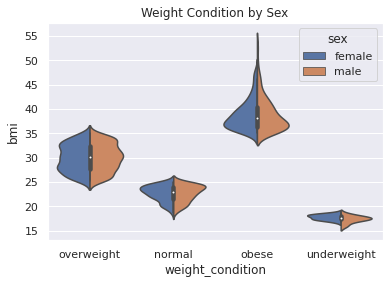

In [32]:
sns.violinplot(x = 'weight_condition', y = 'bmi', hue = 'sex', data = df, split = True)
plt.title('Weight Condition by Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weight Condition by Sex')

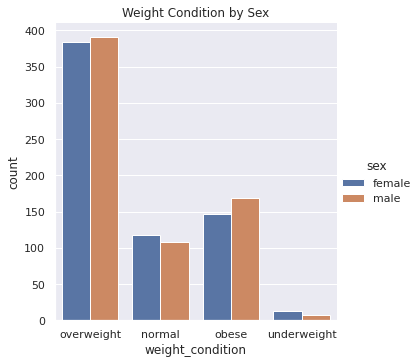

In [33]:
sns.catplot('weight_condition', hue = 'sex', data = df, kind = 'count')
plt.title('Weight Condition by Sex')

In [34]:
#Ortalama BMI
female_bmi_avg= df[df.sex == "female"].bmi.mean()
male_bmi_avg= df[df.sex == "male"].bmi.mean()

#En yüksek BMI
female_bmi_max = df[df.sex == "female"].bmi.max()
male_bmi_max = df[df.sex == "male"].bmi.max()

#En düşük BMI
female_bmi_min = df[df.sex == "female"].bmi.min()
male_bmi_min = df[df.sex == "male"].bmi.min()


print(female_bmi_avg, female_bmi_max, female_bmi_min)
print(male_bmi_avg, male_bmi_max, male_bmi_min)

30.37774924471299 48.07 16.815
30.943128698224854 53.13 15.96


In [ ]:
#Overweight ve obese erkek sayısı kadınlardan daha yüksek. Bunun yanında normal ve underweight kadın sayısı erkeklerden daha fazla. 
#Kadın ve erkeklerin ortalama BMI'ları 30 civarında (overweight). Kadınlarda en düşük BMI 16.815 iken erkeklerde 15.96.
#Kadınlarda en yüksek BMI 48.07 iken erkeklerde 53.13.

5. En çok “children”’a sahip “region”

In [35]:
northwest_c = df[df.region == "northwest"].children.count()
northeast_c = df[df.region == "northeast"].children.count()
southwest_c = df[df.region == "southwest"].children.count()
southheast_c = df[df.region == "southeast"].children.count()

print(northwest_c, northeast_c, southwest_c, southheast_c)

#En çok “children”’a sahip “region”: Southeast

325 324 325 364


Text(0.5, 1.0, 'Children by Region')

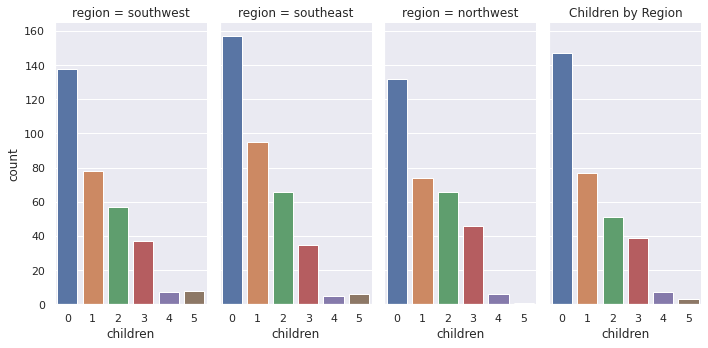

In [36]:
sns.catplot(x = 'children', col = 'region', data = df, kind = 'count', aspect = 0.5)
plt.title('Children by Region')

In [ ]:
#En fazla "children"a sahip "region": Southeast, daha sonra Northwest ve Southwest, en sonuncusu Northeast.

6. “Age” ile “bmi” arasındaki ilişki

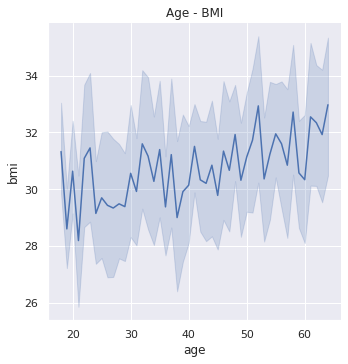

In [37]:
sns.relplot(x = df.age, y = df.bmi, data = df, kind='line') 
plt.title('Age - BMI')
plt.show()

In [182]:
# Age category

df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_category'] = 'youth'
df.loc[(df['age'] >= 36) & (df['age'] <= 55), 'age_category'] = 'adults'
df.loc[df['age'] > 55, 'age_category'] = 'seniors'
df['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

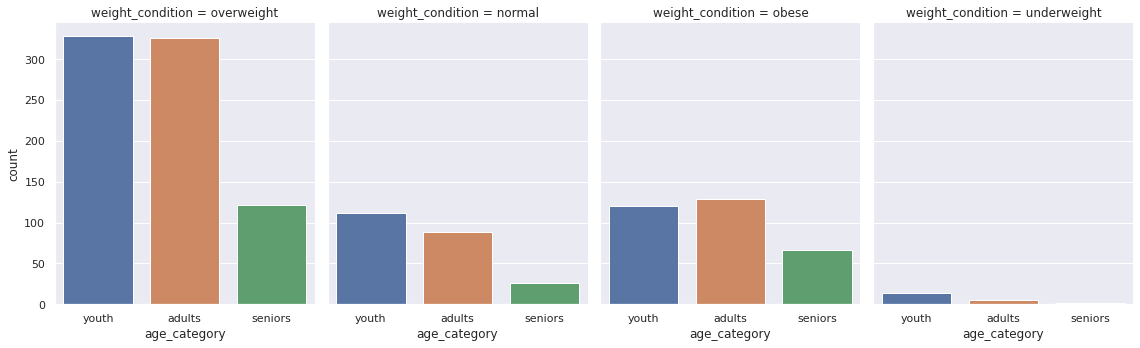

In [183]:
sns.catplot(x = 'age_category', col = 'weight_condition', data = df, kind = 'count', aspect = 0.8)

In [186]:
#Weight condition of youths
youth_underweight = df[df.age_category == "youth"][df.weight_condition == "underweight"].weight_condition.count()
youth_normal = df[df.age_category == "youth"][df.weight_condition == "normal"].weight_condition.count()
youth_overweight = df[df.age_category == "youth"][df.weight_condition == "overweight"].weight_condition.count()
youth_obese = df[df.age_category == "youth"][df.weight_condition == "obese"].weight_condition.count()

#Weight condition of adults
adults_underweight = df[df.age_category == "adults"][df.weight_condition == "underweight"].weight_condition.count()
adults_normal = df[df.age_category == "adults"][df.weight_condition == "normal"].weight_condition.count()
adults_overweight = df[df.age_category == "adults"][df.weight_condition == "overweight"].weight_condition.count()
adults_obese = df[df.age_category == "adults"][df.weight_condition == "obese"].weight_condition.count()

#Weight condition of seniors
seniors_underweight = df[df.age_category == "seniors"][df.weight_condition == "underweight"].weight_condition.count()
seniors_normal = df[df.age_category == "seniors"][df.weight_condition == "normal"].weight_condition.count()
seniors_overweight = df[df.age_category == "seniors"][df.weight_condition == "overweight"].weight_condition.count()
seniors_obese = df[df.age_category == "seniors"][df.weight_condition == "obese"].weight_condition.count()


print(youth_underweight, youth_normal, youth_overweight, youth_obese)
print(adults_underweight, adults_normal, adults_overweight, adults_obese)
print(seniors_underweight, seniors_normal, seniors_overweight,seniors_obese)

14 112 328 120
5 88 326 129
2 26 121 67


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__

In [188]:
age_weight=pd.DataFrame([[14, 112, 328, 120], 
                         [5, 88, 326, 129],
                         [2, 26, 121, 67]], columns=['underwight', 'normal', 'overweight', 'obese'], index = ['youth', 'adults', 'seniors'])

age_weight

,underwight,normal,overweight,obese
youth,14,112,328,120
adults,5,88,326,129
seniors,2,26,121,67


In [ ]:
# Overweight olanların çoğunluğu youth ve adults (<55). Underweight ve normal olanların çoğu youth(<36), obese seniors sayısı diğerlerine göre daha az.

7. “bmi” ile “children” arasındaki ilişki

In [42]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Text(0.5, 1.0, 'Children - BMI')

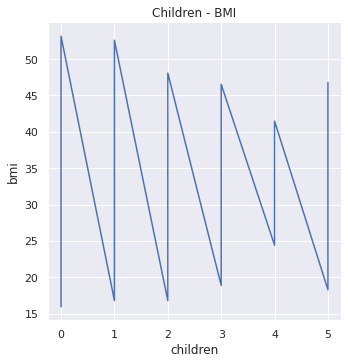

In [43]:
sns.relplot(x="children", y="bmi", kind="line", estimator=None, data=df)
plt.title('Children - BMI')

Text(0.5, 1.0, 'Correlation Between BMI and Children')

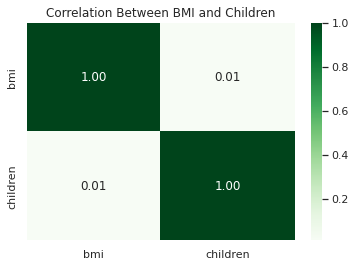

In [44]:
correlation = df[['bmi', 'children']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Greens')
plt.title('Correlation Between BMI and Children')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


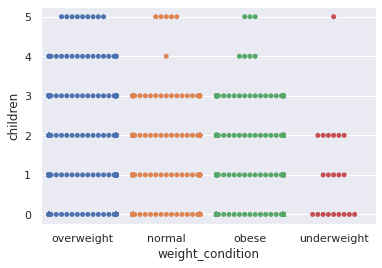

In [45]:
sns.swarmplot(x='weight_condition', y='children', data=df)

In [198]:
# Number of children covered by health insurance / Number of dependents

df.loc[df['children'] > 0, 'covered'] = 'yes'
df.loc[df['children'] == 0, 'covered'] = 'no'
df['covered'].value_counts()

yes    764
no     574
Name: covered, dtype: int64

In [199]:
covered = df['covered']

Text(0.5, 1.0, 'Number of children covered by health insurance- Weight Condition')

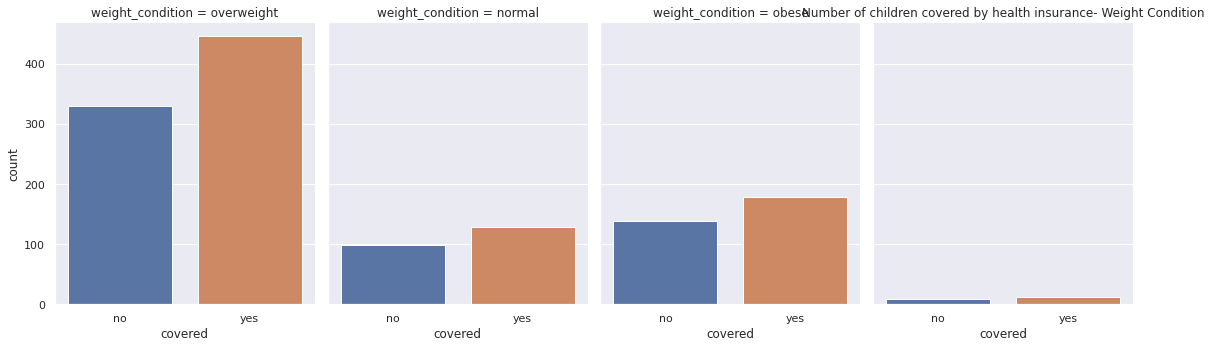

In [48]:
sns.catplot(x = 'covered', col = 'weight_condition', data = df, kind = 'count', aspect = 0.8)
plt.title('Number of children covered by health insurance- Weight Condition')

In [ ]:
#BMI ile children arasında ilişki yok gibi görünüyor.

8. “bmi” değişkeni - outlier

In [49]:
bmi_i=df.bmi
outliers=[]
def detect_outlier(bmi_i):
    
    threshold=3
    mean_1 = np.mean(bmi_i)
    std_1 =np.std(bmi_i)
    
    
    for y in bmi_i:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [50]:
outlier_datapoints = detect_outlier(bmi_i)
print(outlier_datapoints)

[49.06, 50.38, 52.58, 53.13]


In [51]:
print(np.where(df['bmi']>49))

(array([ 116,  847, 1047, 1317]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


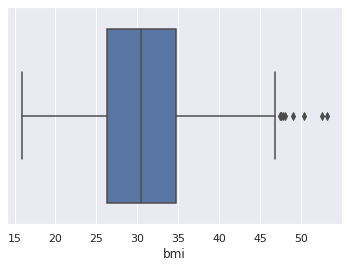

In [52]:
sns.boxplot(df['bmi'])

In [ ]:
# "BMI"da 49 üzeri outlier ve 4 gözlem var. Bunlar, 116, 847, 1047 ve 1317 indexte.

9. “bmi” ile “charges” arasındaki ilişki

Text(0.5, 1.0, 'Charges by BMI')

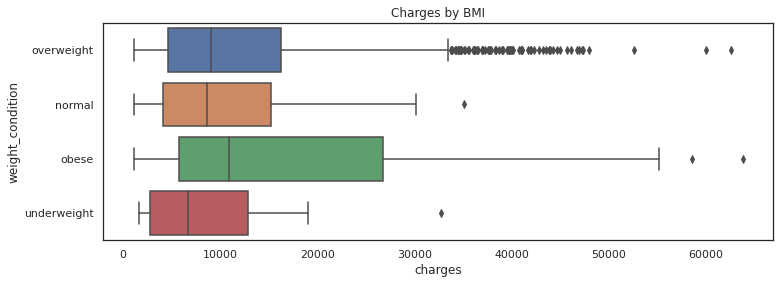

In [53]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['weight_condition'], x = df['charges'])
plt.title('Charges by BMI')

Text(0.5, 1.0, 'Charges by Weight Condition')

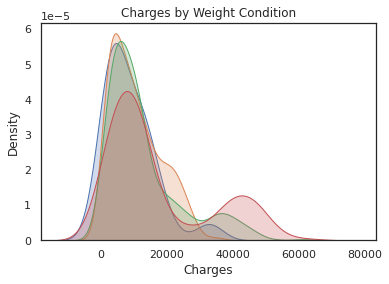

In [54]:
sns.set_style('white')
sns.kdeplot(df.loc[df['weight_condition'] == 'underweight', 'charges'], label = 'underweight', shade = True)
sns.kdeplot(df.loc[df['weight_condition'] == 'normal', 'charges'], label = 'normal', shade = True)
sns.kdeplot(df.loc[df['weight_condition'] == 'overweight', 'charges'], label = 'overweight', shade = True)
sns.kdeplot(df.loc[df['weight_condition'] == 'obese', 'charges'], label = 'obese', shade = True)
plt.xlabel('Charges')
plt.title('Charges by Weight Condition')

Text(0.5, 1.0, 'Correlation Between BMI and Charges')

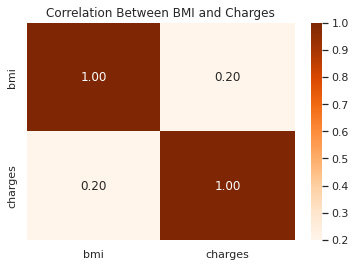

In [55]:
correlation = df[['bmi', 'charges']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Oranges')
plt.title('Correlation Between BMI and Charges')

Text(0.5, 1.0, 'Charges by Weight Region')

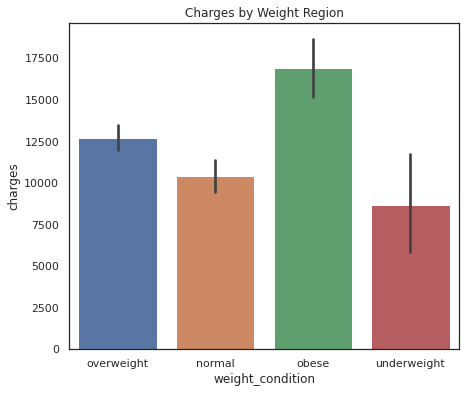

In [56]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'weight_condition', y = 'charges', data = df)
plt.title('Charges by Weight Region')

In [ ]:
#En çok "charges" ödeyenler obese grubu. Daha sonra overweight. 

10. “region”, “smoker” ve “bmi” arasındaki ilişki - bar plot

Text(0.5, 1.0, 'BMI by Region - Smoker')

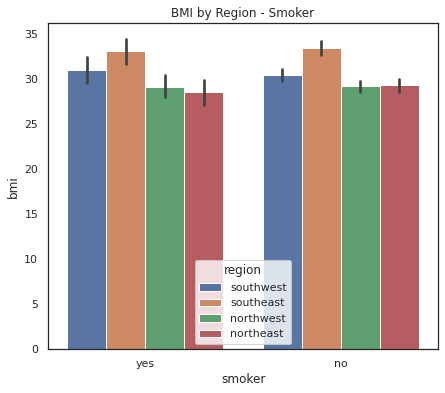

In [193]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'smoker', y = 'bmi', hue = 'region', data = df)
plt.title('BMI by Region - Smoker')

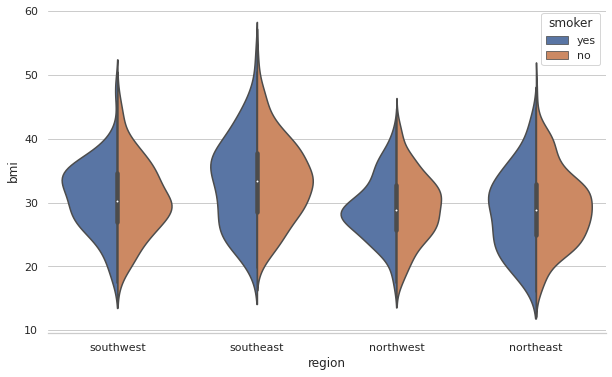

In [58]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.violinplot(x = 'region', y = 'bmi', hue = 'smoker', data = df, split = True)
sns.despine(left = True)

In [ ]:
#Southwest'te sigara içenlerin BMI ortalaması daha yüksekken Northwset'te daha az. 

#Veri Ön İşleme Yapılması
Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getiriniz.
1. Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
2. Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
3. Veri setini normalize ederek ölçekleyiniz.

1. Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.

In [194]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'weight_condition', 'age_category'],
      dtype='object')

In [195]:
#Checking missing values
df.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
weight_condition    0
age_category        0
dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   charges           1338 non-null   float64
 7   weight_condition  1338 non-null   object 
 8   age_category      1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [200]:
#Kategorik değişkenleri numeric hale getirme ve görselleştirme için oluşturulan değişkenleri dataframe'den çıkarma. 

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)


df.drop(["weight_condition", "age_category", "covered"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [201]:
#Değişken veri tipi kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Text(0.5, 1.0, 'Correlation Matrix')

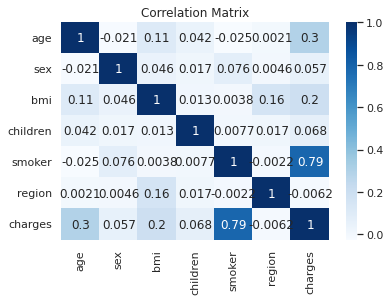

In [86]:
#Değişkenler arasındaki korelasyon matrisi - En yüksek korelasyon smoker ve charges arasında.
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

2. Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.

#Model Deneme 1 (BMI - Charges)

In [202]:
x = df["bmi"]
y = df["charges"]

In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [205]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [206]:
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1070
1070
268
268


In [207]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, y_train.shape)

(1070, 1) (1070, 1)


Model Seçme
Birkaç regresyon modeli seçiniz bunları ön işleme yapılan veri ile eğitiniz.
Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.
En iyi performans gösteren modeli seçiniz.

In [208]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [209]:
lm.fit(x_train,y_train)

LinearRegression()

Modelin optimize Edilmesi

In [210]:
predictions=lm.predict(x_test)
predictions

array([[14374.77609927],
       [13417.00705512],
       [14976.35004436],
       [12110.95835856],
       [12306.86566304],
       [12607.65263558],
       [12344.46403461],
       [11254.11125914],
       [12415.70305442],
       [17857.57262345],
       [14186.78424143],
       [ 8501.51468804],
       [13092.47374264],
       [17726.9677538 ],
       [13092.47374264],
       [ 8382.78298835],
       [16254.69467767],
       [13961.19401203],
       [15201.94027377],
       [14224.382613  ],
       [16290.31418757],
       [10630.76983578],
       [12081.27543363],
       [10674.30479233],
       [13397.21843851],
       [11066.1194013 ],
       [13058.8330944 ],
       [ 9562.18453859],
       [14026.49644685],
       [10804.90966199],
       [10519.95358274],
       [ 9455.32600887],
       [12344.46403461],
       [14073.98912673],
       [13359.62006694],
       [15823.30283547],
       [17683.43279724],
       [12231.66891991],
       [11442.10311698],
       [17117.47836206],


In [211]:
for i in range(len(x_test)):
  print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: [6653.7886] - Predicted Value:[14374.77609927]
1 : Actual Value: [6185.3208] - Predicted Value:[13417.00705512]
2 : Actual Value: [44641.1974] - Predicted Value:[14976.35004436]
3 : Actual Value: [4415.1588] - Predicted Value:[12110.95835856]
4 : Actual Value: [2200.83085] - Predicted Value:[12306.86566304]
5 : Actual Value: [10796.35025] - Predicted Value:[12607.65263558]
6 : Actual Value: [18033.9679] - Predicted Value:[12344.46403461]
7 : Actual Value: [1632.56445] - Predicted Value:[11254.11125914]
8 : Actual Value: [18328.2381] - Predicted Value:[12415.70305442]
9 : Actual Value: [38792.6856] - Predicted Value:[17857.57262345]
10 : Actual Value: [14692.66935] - Predicted Value:[14186.78424143]
11 : Actual Value: [1728.897] - Predicted Value:[8501.51468804]
12 : Actual Value: [38998.546] - Predicted Value:[13092.47374264]
13 : Actual Value: [11093.6229] - Predicted Value:[17726.9677538]
14 : Actual Value: [8825.086] - Predicted Value:[13092.47374264]
15 : Actual V

In [212]:
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.044043773983512446
MAE: 8759.364308624406
MSE: 136105906.1671388


In [213]:
x_predictions = lm.predict(x_train)

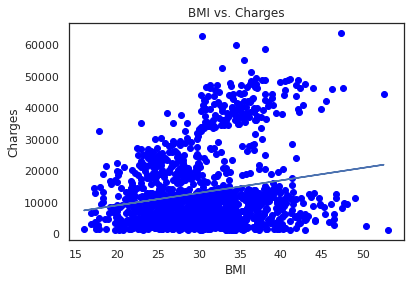

In [214]:
plt.scatter(x=df["bmi"], y=df["charges"], color="blue")
plt.plot(x_train, x_predictions)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs. Charges")
plt.show()

In [215]:
lm.predict([[5]])

array([[3119.01096886]])

#Model Deneme 2 (Charges(-1) - Charges)

In [216]:
x_train = df.drop('charges', axis=1)
y_train = df.loc[:,'charges']

In [217]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [218]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [219]:
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1070
1070
268
268


In [220]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, y_train.shape)

(1070, 1) (1070, 1)


In [221]:
print(lm.intercept_)
print(lm.coef_)
print(lm.score(x_test, y_test))

[1140.14930739]
[[395.77233229]]
0.051286669593991085


In [222]:
lm.fit(x_train,y_train)

LinearRegression()

In [223]:
predictions=lm.predict(x_test)
predictions

array([[15373.2909402 ],
       [13690.38445169],
       [10835.09565318],
       [14922.93568271],
       [16337.8169775 ],
       [ 9172.24547168],
       [13967.5261486 ],
       [16191.95292649],
       [13209.03308336],
       [17180.18187208],
       [15025.04051842],
       [11874.37701662],
       [13971.17274988],
       [14091.51059196],
       [12253.62354925],
       [16217.47913542],
       [13274.67190631],
       [12363.0215875 ],
       [10211.52683512],
       [10072.95598666],
       [ 8388.22619751],
       [14957.57839483],
       [12705.80210737],
       [14853.65025848],
       [12910.01177879],
       [13369.48353947],
       [13156.15736487],
       [15655.90253903],
       [13128.8078553 ],
       [ 9482.20658008],
       [10107.59869878],
       [10246.16954724],
       [12428.66041046],
       [14693.19980237],
       [14988.57450567],
       [13606.51262236],
       [11631.87803182],
       [12888.13217114],
       [13810.72229377],
       [18744.57381915],


In [224]:
for i in range(len(x_test)):
  print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: [12741.16745] - Predicted Value:[15373.2909402]
1 : Actual Value: [6338.0756] - Predicted Value:[13690.38445169]
2 : Actual Value: [2709.1119] - Predicted Value:[10835.09565318]
3 : Actual Value: [2404.7338] - Predicted Value:[14922.93568271]
4 : Actual Value: [10579.711] - Predicted Value:[16337.8169775]
5 : Actual Value: [4005.4225] - Predicted Value:[9172.24547168]
6 : Actual Value: [13393.756] - Predicted Value:[13967.5261486]
7 : Actual Value: [13470.86] - Predicted Value:[16191.95292649]
8 : Actual Value: [16586.49771] - Predicted Value:[13209.03308336]
9 : Actual Value: [24227.33724] - Predicted Value:[17180.18187208]
10 : Actual Value: [8556.907] - Predicted Value:[15025.04051842]
11 : Actual Value: [2104.1134] - Predicted Value:[11874.37701662]
12 : Actual Value: [40974.1649] - Predicted Value:[13971.17274988]
13 : Actual Value: [12231.6136] - Predicted Value:[14091.51059196]
14 : Actual Value: [2331.519] - Predicted Value:[12253.62354925]
15 : Actual Value: 

In [225]:
r2_1 = sklearn.metrics.r2_score(y_test, predictions)
mae_1= sklearn.metrics.mean_absolute_error(y_test, predictions)
mse_1= sklearn.metrics.mean_squared_error(y_test, predictions)

print(f"R2: {r2_1}")
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")

R2: 0.04771390562376965
MAE: 9902.489228234133
MSE: 166155031.4637855


#Model Deneme 3 (Age - Charges)

In [226]:
x = df["age"]
y = df["charges"]

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [228]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [229]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [230]:
lm.fit(x_train,y_train)

LinearRegression()

In [231]:
predictions=lm.predict(x_test)
predictions

array([[10923.3666278 ],
       [15839.89818996],
       [12993.48518028],
       [ 9370.77771343],
       [12475.95554216],
       [10405.83698967],
       [10923.3666278 ],
       [ 8853.24807531],
       [19721.37047588],
       [19721.37047588],
       [18945.07601869],
       [12475.95554216],
       [ 7818.18879906],
       [ 7818.18879906],
       [13252.24999935],
       [18168.78156151],
       [13252.24999935],
       [13511.01481841],
       [17392.48710432],
       [12475.95554216],
       [15581.1333709 ],
       [11440.89626592],
       [13769.77963747],
       [10923.3666278 ],
       [15839.89818996],
       [10664.60180873],
       [10147.07217061],
       [14546.07409465],
       [14804.83891371],
       [19721.37047588],
       [ 8076.95361812],
       [14028.54445653],
       [11440.89626592],
       [12475.95554216],
       [10664.60180873],
       [10405.83698967],
       [11958.42590404],
       [ 9112.01289437],
       [10664.60180873],
       [18686.31119963],


In [232]:
for i in range(len(x_test)):
  print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: [5325.651] - Predicted Value:[10923.3666278]
1 : Actual Value: [9800.8882] - Predicted Value:[15839.89818996]
2 : Actual Value: [15820.699] - Predicted Value:[12993.48518028]
3 : Actual Value: [3044.2133] - Predicted Value:[9370.77771343]
4 : Actual Value: [6548.19505] - Predicted Value:[12475.95554216]
5 : Actual Value: [4719.73655] - Predicted Value:[10405.83698967]
6 : Actual Value: [18765.87545] - Predicted Value:[10923.3666278]
7 : Actual Value: [2254.7967] - Predicted Value:[8853.24807531]
8 : Actual Value: [14901.5167] - Predicted Value:[19721.37047588]
9 : Actual Value: [14410.9321] - Predicted Value:[19721.37047588]
10 : Actual Value: [46599.1084] - Predicted Value:[18945.07601869]
11 : Actual Value: [5472.449] - Predicted Value:[12475.95554216]
12 : Actual Value: [14133.03775] - Predicted Value:[7818.18879906]
13 : Actual Value: [1622.1885] - Predicted Value:[7818.18879906]
14 : Actual Value: [7418.522] - Predicted Value:[13252.24999935]
15 : Actual Value: [

In [233]:
r2_2 = sklearn.metrics.r2_score(y_test, predictions)
mae_2 = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse_2 = sklearn.metrics.mean_squared_error(y_test, predictions)

In [234]:
print(f"R2: {r2_2}")
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")

R2: 0.09190066747765446
MAE: 8614.508302342501
MSE: 122564040.42757869


#Model Deneme 4 (Smoker - Charges)

In [235]:
x = df['smoker']
y = df['charges']

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [237]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [238]:
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1070
1070
268
268


In [239]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, y_train.shape)

(1070, 1) (1070, 1)


In [240]:
lm.fit(x_train,y_train)

LinearRegression()

In [241]:
predictions=lm.predict(x_test)
predictions


array([[ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [ 8371.54947004],
       [32039.11865698],
       [ 8371.54947004],


In [242]:
for i in range(len(x_test)):
  print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: [4185.0979] - Predicted Value:[8371.54947004]
1 : Actual Value: [2207.69745] - Predicted Value:[8371.54947004]
2 : Actual Value: [47055.5321] - Predicted Value:[32039.11865698]
3 : Actual Value: [19496.71917] - Predicted Value:[8371.54947004]
4 : Actual Value: [19964.7463] - Predicted Value:[32039.11865698]
5 : Actual Value: [10085.846] - Predicted Value:[8371.54947004]
6 : Actual Value: [17560.37975] - Predicted Value:[32039.11865698]
7 : Actual Value: [6203.90175] - Predicted Value:[8371.54947004]
8 : Actual Value: [6272.4772] - Predicted Value:[8371.54947004]
9 : Actual Value: [2473.3341] - Predicted Value:[8371.54947004]
10 : Actual Value: [1708.0014] - Predicted Value:[8371.54947004]
11 : Actual Value: [10141.1362] - Predicted Value:[8371.54947004]
12 : Actual Value: [40720.55105] - Predicted Value:[32039.11865698]
13 : Actual Value: [8116.26885] - Predicted Value:[8371.54947004]
14 : Actual Value: [7727.2532] - Predicted Value:[8371.54947004]
15 : Actual Value: 

In [243]:
r2_3 = sklearn.metrics.r2_score(y_test, predictions)
mae_3 = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse_3 = sklearn.metrics.mean_squared_error(y_test, predictions)

print(f"R2: {r2_3}")
print(f"MAE: {mae_3}")
print(f"MSE: {mse_3}")

R2: 0.5871977476323442
MAE: 6067.852929690274
MSE: 66030352.00060632


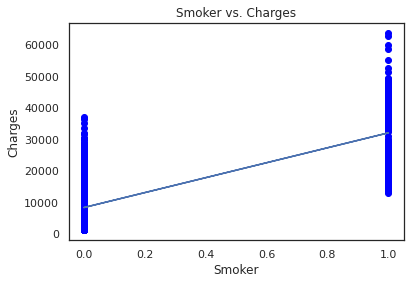

In [244]:
x_predictions = lm.predict(x_train)

plt.scatter(x=df["smoker"], y=df["charges"], color="blue")
plt.plot(x_train, x_predictions)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Smoker vs. Charges")
plt.show()

In [245]:
from sklearn.linear_model import SGDRegressor

In [246]:
sg = SGDRegressor()

In [247]:
sg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [248]:
x_predictions = sg.predict(x_train)

In [249]:
r2_4 = sklearn.metrics.r2_score(y_test, predictions)
mae_4= sklearn.metrics.mean_absolute_error(y_test, predictions)
mse_4= sklearn.metrics.mean_squared_error(y_test, predictions)

print(f"R2: {r2_4}")
print(f"MAE: {mae_4}")
print(f"MSE: {mse_4}")

R2: 0.5871977476323442
MAE: 6067.852929690274
MSE: 66030352.00060632


In [250]:
print(r2,r2_1,r2_2,r2_3,r2_4)
print(mae, mae_1,mae_2, mae_3, mae_4)
print(mse, mse_1, mse_2, mse_3, mse_4)

0.044043773983512446 0.04771390562376965 0.09190066747765446 0.5871977476323442 0.5871977476323442
8759.364308624406 9902.489228234133 8614.508302342501 6067.852929690274 6067.852929690274
136105906.1671388 166155031.4637855 122564040.42757869 66030352.00060632 66030352.00060632
